In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib import rcParams
from scipy.optimize import curve_fit
from cycler import cycler
from matplotlib.patches import Rectangle

In [292]:
plt.rcdefaults()

# axes
rcParams['axes.grid'] = True
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.axisbelow'] = True
rcParams['axes.prop_cycle'] = cycler('color', ['teal', 'firebrick', 'darkgoldenrod', 'navy', 'olive', 'darkorchid', 'slategray', 'mediumvioletred', 'saddlebrown', 'black'])

# figure:
rcParams['figure.autolayout'] = True
rcParams['figure.dpi'] = 100
rcParams['figure.figsize'] = [7.4, 4.8]


# fontsizes
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12
rcParams['legend.title_fontsize'] = 12
rcParams['axes.labelsize'] = 16
# rcParams['axes.title.size'] = 16

rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'

# legend
# rcParams['legend.framealpha'] = 1
rcParams['legend.fancybox'] = False
rcParams['legend.edgecolor'] = 'gray'


# save
rcParams['savefig.bbox'] = 'tight'

In [293]:
# extracción de datos
data = pd.read_csv('Mediciones/2 vortices separados 5.5 cm mismo sentido verde-amarillo-azul.txt', header = 0, names = ['x', 'y', 'u', 'v', 'tipo'], dtype = {'x': np.float64, 'y': np.float64, 'u': np.float64, 'v': np.float64, 'tipo': np.int32})
x, y, u, v, tipo = np.array(data['x'])*100, np.array(data['y'])*100, np.array(data['u'])*100, np.array(data['v'])*100, np.array(data['tipo']) # u = v_x, v = v_y

Text(0, 0.5, '$v_x$')

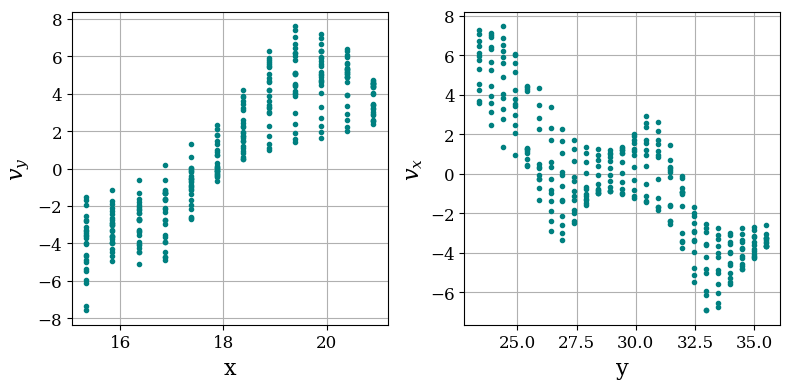

In [294]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(x, v, '.')
ax1.set_xlabel('x')
ax1.set_ylabel(r'$v_y$')
ax2.plot(y, u, '.')
ax2.set_xlabel('y')
ax2.set_ylabel(r'$v_x$')

In [295]:
valores_x = [x[0]] # tira de valores discretos de x
indices_x = [0]
for i in range(len(x)):
    if x[i] != valores_x[-1]:
        indices_x.append(np.nonzero(x == x[i])[0][0])
        valores_x.append(x[i])

valores_v = [np.array([]) for i in range(len(valores_x))] # lista con arrays de v_y para cada y sobre los x discretizados 
for n in range(len(valores_x)-1):
    tramo = v[indices_x[n]:indices_x[n+1]]
    valores_v[n] = np.append(valores_v[n], tramo)
valores_v[-1] = np.append(valores_v[-1], v[indices_x[-1]:])

valores_y = np.array([y[0]]) # valores discretizados de y
for i in range(len(y)):
    if y[i] not in valores_y:
        valores_y = np.append(valores_y, y[i])
valores_y.sort()

valores_u = [np.array([]) for i in range(len(valores_y))] # lista con arrays de v_x para cada x sobre los y discretizados 
for i, val_y in enumerate(y):
    ind = np.nonzero(valores_y == val_y)[0][0]
    valores_u[ind] = np.append(valores_u[ind], u[i])

In [296]:
# xg
v_mean = np.array([np.mean(valores_v[n]) for n in range(len(valores_x))])
v_abs = np.abs(v_mean)
min_v = v_mean[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]] # sobre el promedio
xg = valores_x[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]] 

# yg, y01, y02
u_mean = np.array([np.mean(l) for l in valores_u])
u_abs = np.abs(u_mean)
index = np.where(u_abs == np.min(u_abs[len(u_abs)//3:2*len(u_abs)//3]))[0][0]
min_u = u_mean[index] # sobre el promedio
yg = valores_y[index]

min_u_1 = u_mean[np.where(u_abs == np.min(u_abs[:index]))[0][0]]
y01 = valores_y[np.where(u_abs == np.min(u_abs[:index]))]

min_u_2 = u_mean[np.where(u_abs == np.min(u_abs[index+1:]))[0][0]]
y02 = valores_y[np.where(u_abs == np.min(u_abs[index+1:]))]

umin = [] # velocidad en x mínima sobre cada valor discreto de y
indices_umin = [] # índice de cada umin obtenido en el array "general" u
for n in range(len(valores_x)):
    tramo = np.array([np.abs(val_u[n]) for val_u in valores_u])
    minimo = np.min(tramo)
    indice_min = tramo.argmin() + indices_x[n]
    indices_umin.append(indice_min)
    umin = np.append(umin, minimo)

# yf
y_vel0 = [y[i] for i in indices_umin] # posición en y de las umin
yf = np.mean(y_vel0) # y promedio de la velocidad mínima en v (la línea de vel x = 0 teórica) 
err_yf = np.std(y_vel0)/np.sqrt(len(y_vel0))
print(f'el valor de y para el cual la velocidad en x es mínima (teóricamente 0) a lo largo de x \n(calculado promedio de las posiciones en y donde u es min para cada x) es {yf} cm (sin cambiar el origen)')

yf2 = valores_y[np.abs(valores_y - yf).argmin()] # valor de y discreto más cercano a la línea calculada yf 
print(f'el valor de y discretizado más cercano a esa línea  {yf2} cm (sin cambiar el origen)')

u_sobre_yf2 = np.abs(valores_u[np.abs(valores_y - yf).argmin()]) # módulo de v_x sobre el y discreto más cercano a yf

u_sobre_yf2_mean = np.mean(u_sobre_yf2)

err_u_sobre_yf2 = np.std(u_sobre_yf2)/np.sqrt(len(u_sobre_yf2))
print(f'el módulo promedio la velocidad en x (u) sobre esa línea es ({u_sobre_yf2_mean} +- {err_u_sobre_yf2}) cm/s (sin cambiar el origen)')


# ug, vg
vg = valores_v[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]][index]
ug = valores_u[index][np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]
print(f'la velocidad en el punto donde teóricamente esperamos velocidad 0 es ({ug}, {vg}) cm/s')

el valor de y para el cual la velocidad en x es mínima (teóricamente 0) a lo largo de x 
(calculado promedio de las posiciones en y donde u es min para cada x) es 28.8804488875 cm (sin cambiar el origen)
el valor de y discretizado más cercano a esa línea  28.922548889999998 cm (sin cambiar el origen)
el módulo promedio la velocidad en x (u) sobre esa línea es (0.7263168595516666 +- 0.09142449894634874) cm/s (sin cambiar el origen)
la velocidad en el punto donde teóricamente esperamos velocidad 0 es (0.3089790931, 0.9908957406999999) cm/s


Text(0, 0.5, '$\\langle v_x \\rangle$')

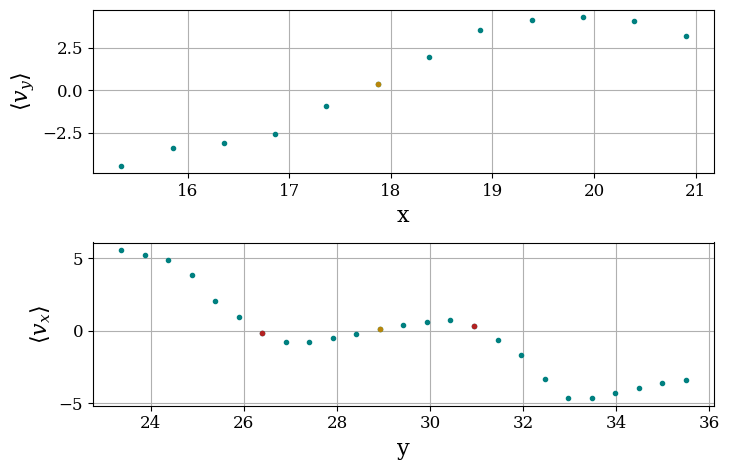

In [297]:
# VORTICE DE ABAJO (1)
x1 = valores_x
v1 = [val_v[:index] for val_v in valores_v]

# centro x
v_mean = np.array([np.mean(v1[n]) for n in range(len(x1))])
v_abs = np.abs(v_mean)
min_v = v_mean[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]
x01 = x1[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]

# VORTICE DE ARRIBA (2)
x2 = valores_x
v2 = [val_v[index+1:] for val_v in valores_v]

# centro x
v_mean = np.array([np.mean(v2[n]) for n in range(len(x2))])
v_abs = np.abs(v_mean)
min_v = v_mean[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]
x02 = x2[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]


fig1, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(valores_x, v_mean, '.')
ax1.plot(xg, min_v, '.', color='darkgoldenrod')
ax2.plot(valores_y, u_mean, '.')
ax2.plot([y01, y02], [min_u_1, min_u_2], '.')
ax2.plot(yg, min_u, '.')
ax1.set_xlabel('x')
ax1.set_ylabel(r'$\langle v_y \rangle$')
ax2.set_xlabel('y')
ax2.set_ylabel(r'$\langle v_x \rangle$')

In [298]:
# definición del origen:

y0 = (y02+y01)/2
x0 = (x02+x01)/2

In [299]:
# traslado todo lo calculado hasta ahora:
x = x - x0
y = y - y0

x01 = x01 - x0
y01 = y01 - y0
x02 = x02 - x0
y02 = y02 - y0

xg = xg - x0
yg = yg - y0 

yf = yf - y0

Text(0, 0.5, 'y')

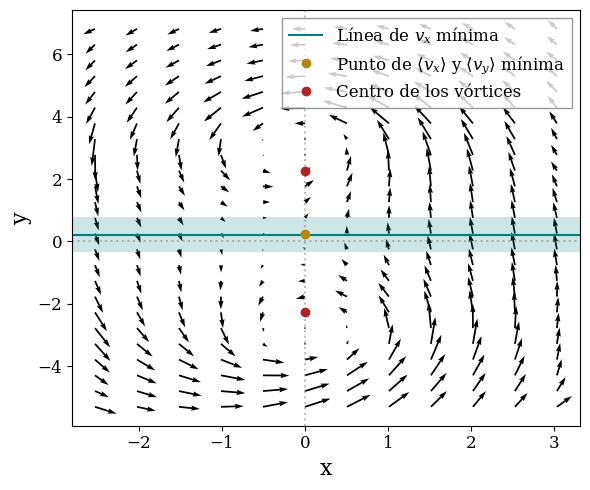

In [300]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.grid(False)
ax.axvline(0, linestyle='dotted', color='gray', alpha=0.5)
ax.axhline(0, linestyle='dotted', color='gray', alpha=0.5)
Q = ax.quiver(x, y, u, v)
ax.axhline(yf, label=r'Línea de $v_x$ mínima')
# esto ultimo no sé si tiene tanto sentido graficarlo pero lo dejo y lo charlamos
ax.plot(xg, yg, 'o', color='darkgoldenrod', label=r'Punto de $\langle v_x \rangle$ y $\langle v_y \rangle$ mínima')
ax.plot([x01, x02], [y01, y02], 'o', label='Centro de los vórtices', color='firebrick')
ax.add_patch(Rectangle((ax.get_xlim()[0], yf[0] - err_yf), ax.get_xlim()[1] - ax.get_xlim()[0], 2*err_yf, alpha = 0.2))
ax.legend(loc='upper right')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [301]:
# Datos cuantitativos que es interesante reportar:
print(f'Línea horizontal (promedio) de velocidad en x mínima: ({yf} +- {err_yf}) cm')
print(f'Línea horizontal (discreta) de velocidad en y mínima: {yf2}') # la más cercana a esa línea
print(f'Promedio del módulo de la velocidad en x sobre esa línea: ({u_sobre_yf2_mean} +- {err_u_sobre_yf2}) cm/s')
print(f'Punto de v_x y v_y mínima (punto donde la teoría dice velocidad 0) : {(xg, yg[0])} cm')
print(f'Velocidad en ese punto: {(ug, vg)} cm/s')

Línea horizontal (promedio) de velocidad en x mínima: ([0.21050001] +- 0.5599692479901098) cm
Línea horizontal (discreta) de velocidad en y mínima: 28.922548889999998
Promedio del módulo de la velocidad en x sobre esa línea: (0.7263168595516666 +- 0.09142449894634874) cm/s
Punto de v_x y v_y mínima (punto donde la teoría dice velocidad 0) : (0.0, 0.2526000149999952) cm
Velocidad en ese punto: (0.3089790931, 0.9908957406999999) cm/s
